In [1]:
import math
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
import time
import random
import openpyxl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.utils import shuffle
from openpyxl import load_workbook

In [3]:
df = pd.read_csv('KT_Sita.csv')
df1 = pd.read_csv('B_Sita.csv')
df2 = pd.read_csv('SW_line_Sita.csv')
df3 = pd.read_csv('SW_smooth_Sita.csv')
df4 = pd.read_csv('MS_Sita.csv')
df5=pd.read_csv('TW_sita.csv')

In [4]:
df = pd.concat([df,df1,df2,df3,df4,df5]).reset_index(drop=True) 
df = shuffle(df).reset_index(drop=True)
df

,frame,sita1,sita2,sita3,sita4,sita5,sita6,sita7,sita8,sita9,...,sita22,sita23,sita24,sita25,sita26,sita27,sita28,sita29,sita30,face
0,32962.0,26.606499,59.180330,94.213172,22.823840,108.602668,48.573492,67.587146,72.373759,40.039095,...,0.000000,0.000000,0.000000,68.037661,23.036698,88.925641,37.060276,10.855320,132.084404,1
1,15171.0,30.631028,69.195667,80.173305,19.635485,114.369329,45.995186,65.725180,70.994254,43.280566,...,0.000000,0.000000,0.000000,69.569244,21.011359,89.419398,28.410188,10.662636,140.927175,1
2,22044.0,27.843696,46.616477,105.539827,29.181720,102.796662,48.021618,68.507134,81.446697,30.046169,...,0.000000,0.000000,0.000000,71.592001,30.278256,78.129743,41.470073,9.948059,128.581868,1
3,6320.0,26.593739,53.031395,100.374866,31.157865,90.212248,58.629886,72.118553,75.641867,32.239580,...,8.870001,3.002261,168.127737,61.358455,27.531423,91.110121,41.249333,9.683077,129.067591,1
4,29859.0,29.136533,54.712220,96.151247,29.639262,94.143109,56.217628,78.233302,71.098873,30.667825,...,11.039635,3.403152,165.557213,66.922484,26.156310,86.921206,43.721216,10.156811,126.121973,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72406,33193.0,23.305021,56.098619,100.596360,25.001373,95.376570,59.622057,57.236042,81.220364,41.543594,...,0.000000,0.000000,0.000000,54.501488,23.964752,101.533760,32.487293,9.816556,137.696150,1
72407,31333.0,23.071002,57.895032,99.033966,21.575089,110.607210,47.817700,59.988997,74.184384,45.826619,...,5.329891,2.188106,172.482003,63.527905,23.000600,93.471495,36.594473,11.298952,132.106575,1
72408,23424.0,30.784511,55.948694,93.266796,24.437571,109.217070,46.345359,72.163767,69.905890,37.930343,...,0.000000,0.000000,0.000000,71.281574,24.164554,84.553871,41.142563,12.579798,126.277639,1
72409,25973.0,26.145655,54.371754,99.482591,24.712214,103.446642,51.841144,61.039941,81.224579,37.735480,...,0.000000,0.000000,0.000000,64.131714,25.904578,89.963708,34.163715,10.107019,135.729266,1


In [5]:
data = df.drop(labels=['frame','face'],axis=1).values
target = df.face.values

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.7, random_state=20)



In [6]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [7]:
#資料數量確認

n_samples, n_features = X_train.shape
print('X_train:',n_samples)
print('x_test:',len(y_test))
print('feature:',n_features)
print(X_train[0,:])

print('train+test:',(len(X_train)+len(X_test)))
print('data:',len(data))

X_train: 54308
x_test: 18103
feature: 30
[-1.06198913 -0.08696772  0.63558784 -0.16037021 -0.58814155  0.85682594
 -1.03506851  1.07032559  0.01162646 -0.15391424  0.93044011 -0.67615459
 -0.64562633  0.67939166 -0.17642924 -0.6314767   0.83905306 -0.50798852
 -0.586262   -0.70583407  0.67543016  0.65095454  0.62996176  1.08480945
 -0.79119644  0.22117474  0.72326963 -0.90732078 -1.06054966  0.99757212]
train+test: 72411
data: 72411


In [8]:
#手動調整參數

svc_model = svm.SVC(gamma='auto', C=30, kernel='rbf',probability=True)

start = time.time()
svc_model.fit(X_train, y_train)
print("score :",svc_model.score(X_train, y_train))
end = time.time() - start
print("time is\n",end)
print("\n")

# K折交叉驗證模組
from sklearn.model_selection import cross_val_score 

start = time.time()
#使用K折交叉驗證模組
scores = cross_val_score(svc_model, X_val, y_val, cv=10, scoring='accuracy')
end = time.time() - start
print("time is\n",end)


print(scores)
print(scores.mean())

score : 0.9224239522722251
time is
 701.4658374786377


time is
 310.0932340621948
[0.90778575 0.90392049 0.90447267 0.91270718 0.91049724 0.90441989
 0.9038674  0.91049724 0.90331492 0.90220994]
0.9063692718836087


In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

svc_pred = svc_model.predict(X_test)

print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[ 1130  1254]
 [  240 15479]]
              precision    recall  f1-score   support

           0       0.82      0.47      0.60      2384
           1       0.93      0.98      0.95     15719

    accuracy                           0.92     18103
   macro avg       0.87      0.73      0.78     18103
weighted avg       0.91      0.92      0.91     18103



In [11]:
#保存Model(注:save資料夾要預先建立，否則會錯誤)
joblib.dump(svc_model, 'save/findFaceModel1.pkl')
joblib.dump(ss,'save/ssFace1.pkl')
#svc_model = joblib.load('clf.pkl')

['save/ssFace1.pkl']

Text(0.5, 0.98, 'Predicted versus actual labels')

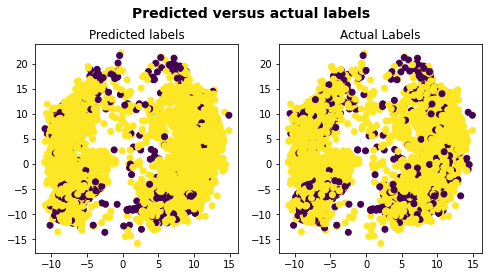

In [10]:
from sklearn.manifold import Isomap
# 對 `digits` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_test)

# 繪製圖形與調整外觀
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.subplots_adjust(top=0.85)

# 繪製散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=svc_pred)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_test)
ax[1].set_title('Actual Labels')

# 加入標題
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')


In [17]:
#使用隨機森林
from sklearn.ensemble import RandomForestClassifier
#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators= 10,
 max_depth= 10)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train))

#預測測試組
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test,rfc_pred))

0.9401929734109156
[[ 1170  1214]
 [  104 15615]]
              precision    recall  f1-score   support

           0       0.92      0.49      0.64      2384
           1       0.93      0.99      0.96     15719

    accuracy                           0.93     18103
   macro avg       0.92      0.74      0.80     18103
weighted avg       0.93      0.93      0.92     18103



In [29]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [30]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [35]:
best_random = rf_random.best_estimator_
predictions = best_random.predict(X_test)
print(confusion_matrix(y_test,predictions))

#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test,predictions))

[[ 1522   862]
 [  163 15556]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      2384
           1       0.95      0.99      0.97     15719

    accuracy                           0.94     18103
   macro avg       0.93      0.81      0.86     18103
weighted avg       0.94      0.94      0.94     18103



In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [4,6,8],
    'n_estimators': [100, 150, 200]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 30.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [80, 90, 100],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [40]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [41]:
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(X_test)
print(confusion_matrix(y_test,predictions))

#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test,predictions))

[[ 1523   861]
 [  164 15555]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      2384
           1       0.95      0.99      0.97     15719

    accuracy                           0.94     18103
   macro avg       0.93      0.81      0.86     18103
weighted avg       0.94      0.94      0.94     18103

